In [99]:
#create reference for CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
#read CSV file into a dataframe
olympics_path = "resources/athlete_events.csv"

olympics_df = pd.read_csv(olympics_path, low_memory = False)

#print the first 5 rows
olympics_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [101]:
# use only the Summer Olympics for Analysis
summer_df = olympics_df[olympics_df['Season'] == 'Summer']

# create a dataframe for only the UK team in the Summer Olympics
gb_df = summer_df[summer_df['NOC'] == 'GBR']


In [102]:
# create a dataframe for the UK team in the Summer Olympics grouped by Games. 
games_df_gb = gb_df.groupby('Games').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
games_df_gb['gold_medals'] = gb_df[gb_df['Medal'] == 'Gold'].groupby('Games').agg({'Medal': ['count']})
games_df_gb['silver_medals'] = gb_df[gb_df['Medal'] == 'Silver'].groupby('Games').agg({'Medal': ['count']})
games_df_gb['bronze_medals'] = gb_df[gb_df['Medal'] == 'Bronze'].groupby('Games').agg({'Medal': ['count']})

# fill NaN values with 0
games_df_gb = games_df_gb.fillna(0)

# format values in all columns except Games to integers
games_df_gb = games_df_gb.astype(int)

games_df_gb

,Medal,gold_medals,silver_medals,bronze_medals
,count,,,
Games,,,,
1896 Summer,9,3,3,3
1900 Summer,108,59,34,15
1904 Summer,2,1,1,0
1906 Summer,39,9,22,8
1908 Summer,368,147,131,90
1912 Summer,170,47,64,59
1920 Summer,111,52,42,17
1924 Summer,64,15,30,19


In [103]:
# Add a column for non-medal participations, which is the count of all rows for Games where Medal is NaN
games_df_gb['non_medal_participations'] = gb_df[gb_df['Medal'].isnull()].groupby('Games').size()

# Add a column for total participations, which is the count of all rows for Games.
# This includes 0 or NaN values for medals
games_df_gb['total_participations'] = gb_df.groupby('Games').size()
games_df_gb

,Medal,gold_medals,silver_medals,bronze_medals,non_medal_participations,total_participations
,count,,,,,
Games,,,,,,
1896 Summer,9,3,3,3,16,25
1900 Summer,108,59,34,15,38,146
1904 Summer,2,1,1,0,4,6
1906 Summer,39,9,22,8,74,113
1908 Summer,368,147,131,90,604,972
1912 Summer,170,47,64,59,291,461
1920 Summer,111,52,42,17,234,345
1924 Summer,64,15,30,19,364,428


In [104]:
#create new dataframe filtered by columns team, games, year, season, sport, event, medal, city
summer_games_df = summer_df[["Team", "Games", "Year", "Season", "Sport", "Event", "Medal", "City"]]

summer_games_df.head()

,Team,Games,Year,Season,Sport,Event,Medal,City
0,China,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,NaN,Barcelona
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
2,Denmark,1920 Summer,1920,Summer,Football,Football Men's Football,NaN,Antwerpen
3,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Paris
26,Netherlands,1932 Summer,1932,Summer,Athletics,Athletics Women's 100 metres,NaN,Los Angeles


In [105]:
#Clean the Data
#Rename column team to country
summer_games_df = summer_games_df.rename(columns = {"Team": "Country"})
#Rename city to host 
summer_games_df = summer_games_df.rename(columns = {"City": "Host"})

#Filter to the Host Year
summer_games_df = summer_games_df[summer_games_df["Year"] == 2012]

# Clean country names
summer_games_df['Country'] = summer_games_df['Country'].replace({'United States-1': 'United States', 'United States-2': 'United States'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Great Britain-1': 'Great Britain', 'Great Britain-2': 'Great Britain'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'France-1': 'France', 'France-2': 'France'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'China-1': 'China', 'China-2': 'China'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Germany-1': 'Germany'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Latvia-1': 'Latvia'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Russia-1': 'Russia'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Japan-1': 'Japan'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Brazil-1': 'Brazil'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'Czech Republic-1': 'Czech Republic'})
summer_games_df['Country'] = summer_games_df['Country'].replace({'South Korea-1': 'South Korea'})




summer_games_df

,Country,Games,Year,Season,Sport,Event,Medal,Host
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
98,France,2012 Summer,2012,Summer,Athletics,"Athletics Men's 1,500 metres",NaN,London
134,Morocco,2012 Summer,2012,Summer,Boxing,Boxing Men's Light-Welterweight,NaN,London
164,Russia,2012 Summer,2012,Summer,Athletics,Athletics Women's Javelin Throw,NaN,London
174,France,2012 Summer,2012,Summer,Handball,Handball Men's Handball,Gold,London
...,...,...,...,...,...,...,...,...
271020,Hungary,2012 Summer,2012,Summer,Table Tennis,Table Tennis Men's Singles,NaN,London
271023,Germany,2012 Summer,2012,Summer,Badminton,Badminton Men's Singles,NaN,London
271052,Kazakhstan,2012 Summer,2012,Summer,Athletics,Athletics Women's 200 metres,NaN,London
271090,Poland,2012 Summer,2012,Summer,Sailing,Sailing Men's Two Person Keelboat,NaN,London


In [106]:
#Drop Unnecessary Columns
summer_games_metals_df = summer_games_df.drop(columns = ["Games", "Sport", "Event"])

summer_games_metals_df

,Country,Year,Season,Medal,Host
1,China,2012,Summer,NaN,London
98,France,2012,Summer,NaN,London
134,Morocco,2012,Summer,NaN,London
164,Russia,2012,Summer,NaN,London
174,France,2012,Summer,Gold,London
...,...,...,...,...,...
271020,Hungary,2012,Summer,NaN,London
271023,Germany,2012,Summer,NaN,London
271052,Kazakhstan,2012,Summer,NaN,London
271090,Poland,2012,Summer,NaN,London


In [107]:
#create a new dataframe thatn removes all rows that have an Na in the medal column
gb2012_medals_df = summer_games_metals_df.dropna(subset = ["Medal"]) 

gb2012_medals_df

,Country,Year,Season,Medal,Host
174,France,2012,Summer,Gold,London
684,Canada,2012,Summer,Bronze,London
789,Russia,2012,Summer,Bronze,London
790,Russia,2012,Summer,Silver,London
861,Egypt,2012,Summer,Silver,London
...,...,...,...,...,...
270434,China,2012,Summer,Gold,London
270435,China,2012,Summer,Gold,London
270436,China,2012,Summer,Bronze,London
270440,China,2012,Summer,Gold,London


In [108]:
#create new columns for "Gold" medals, "Silver" medals, "Bronze" medals, and "Total Medals"
gb2012_medal_countrys_df = gb2012_medals_df.groupby('Country').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
gb2012_medal_countrys_df['Gold'] = gb2012_medals_df[gb2012_medals_df['Medal'] == 'Gold'].groupby('Country').agg({'Medal': ['count']})
gb2012_medal_countrys_df['Silver'] = gb2012_medals_df[gb2012_medals_df['Medal'] == 'Silver'].groupby('Country').agg({'Medal': ['count']})
gb2012_medal_countrys_df['Bronze'] = gb2012_medals_df[gb2012_medals_df['Medal'] == 'Bronze'].groupby('Country').agg({'Medal': ['count']})

# fill NaN values with 0
gb2012_medal_countrys_df = gb2012_medal_countrys_df.fillna(0)

# format values in all columns except Games to integers
gb2012_medal_countrys_df = gb2012_medal_countrys_df.astype(int)

gb2012_medal_countrys_df

,Medal,Gold,Silver,Bronze
,count,,,
Country,,,,
Afghanistan,1,0,0,1
Algeria,1,1,0,0
Argentina,19,1,15,3
Armenia,3,0,1,2
Australia,114,18,37,59
...,...,...,...,...
Uganda,1,1,0,0
Ukraine,26,9,5,12


In [109]:
#View values in the Country index
gb2012_medal_countrys_df.index

Index(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Belarus', 'Belgium', 'Botswana',
       'Brazil', 'Bulgaria', 'Canada', 'China', 'Chinese Taipei', 'Colombia',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Denmark-1',
       'Dominican Republic', 'Egypt', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Georgia', 'Germany', 'Great Britain', 'Greece',
       'Grenada', 'Guatemala', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand',
       'North Korea', 'Norway', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 

In [110]:
## Sort the DataFrame by 'Host' (UK first) and then by total medals in descending order
# Sort dataframe by total medal count
gb2012_sorted = gb2012_medal_countrys_df.iloc[gb2012_medal_countrys_df.iloc[:-1].sum(axis=1).argsort()[::-1]]

# Move Great Britain row to the top
gb_row = gb2012_sorted.loc['Great Britain']
df_sorted = gb2012_sorted.drop('Great Britain')
gb2012_sorted = pd.concat([gb_row.to_frame().transpose(), gb2012_sorted])

gb2012_sorted.head(10)

,Medal,Gold,Silver,Bronze
,count,,,
Great Britain,126,48,30,48
United States,248,145,57,46
Russia,140,50,39,51
Great Britain,126,48,30,48
China,125,56,40,29
Australia,114,18,37,59
Germany,94,45,27,22
Japan,84,7,44,33
France,82,30,30,22


In [87]:
#Rename Medal, count column to Total Medals
gb2012_sorted = gb2012_sorted.rename(columns = {"Medal" : "Total Medals"})
gb2012_sorted = gb2012_sorted.rename(columns = {"count" : " "})

gb2012_sorted.head(10)

,Total Medals,Gold,Silver,Bronze
,,,,
Great Britain,126,48,30,48
United States,248,145,57,46
Russia,140,50,39,51
Great Britain,126,48,30,48
China,125,56,40,29
Australia,114,18,37,59
Germany,94,45,27,22
Japan,84,7,44,33
France,82,30,30,22


<Axes: >

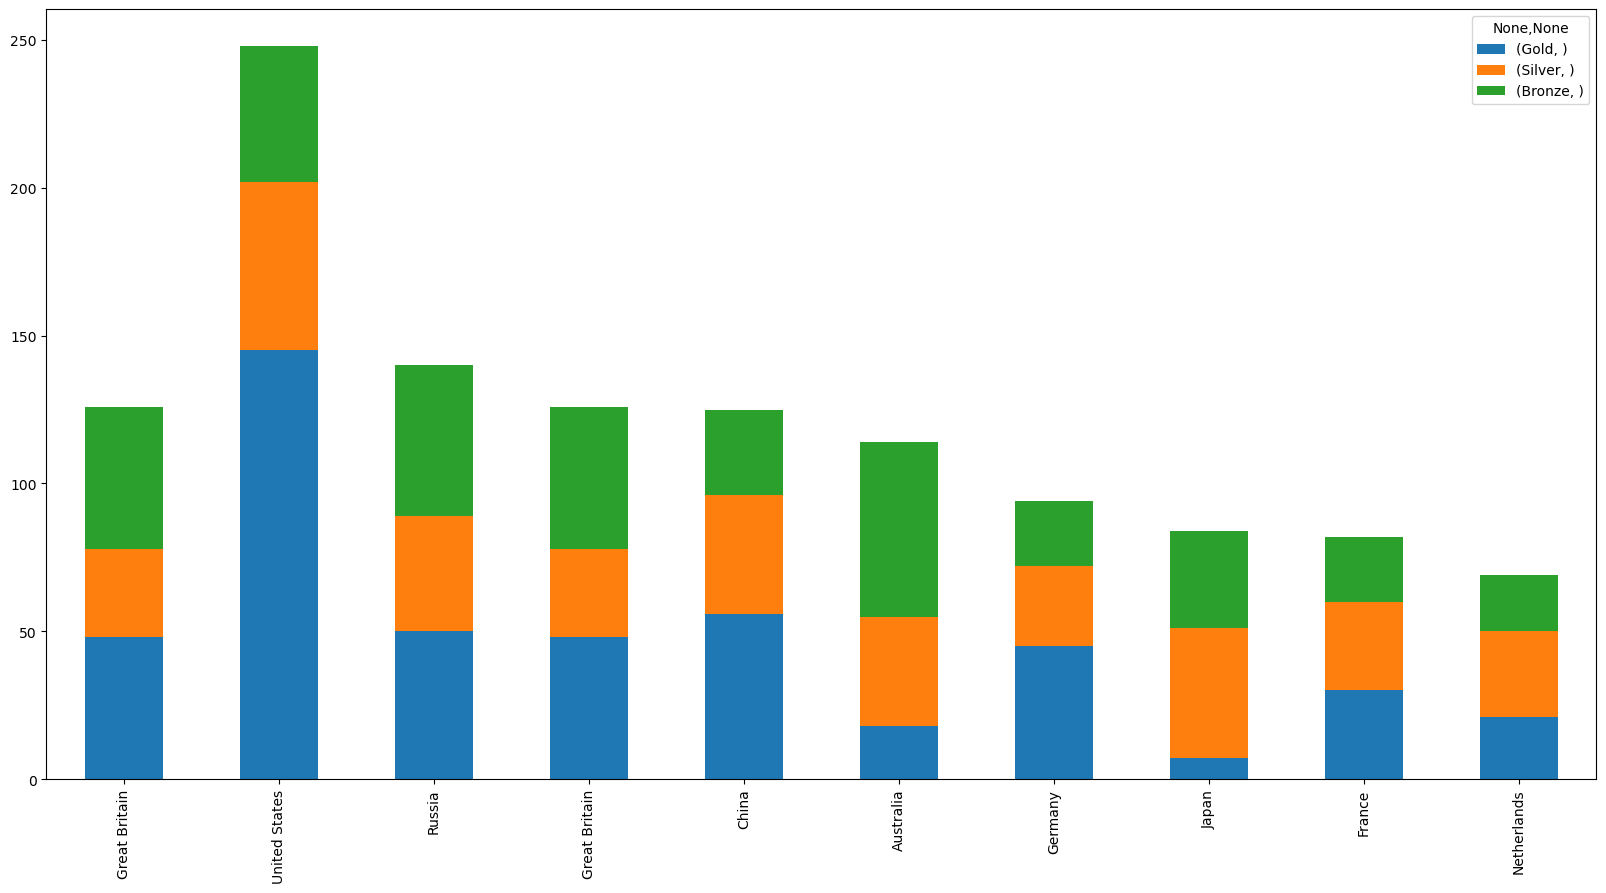

In [88]:
# Use a line chart to plot the medal count for the Chinese team in the Summer Olympics.
gb2012_sorted.head(10)[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(20, 10))


** Normalizing the Team Sport Medal Counts **

In [89]:
#View all the values in the Sport column
summer_games_df['Event'].unique()

array(["Judo Men's Extra-Lightweight", "Athletics Men's 1,500 metres",
       "Boxing Men's Light-Welterweight",
       "Athletics Women's Javelin Throw", "Handball Men's Handball",
       "Rowing Women's Coxless Pairs",
       "Athletics Men's 110 metres Hurdles", "Boxing Men's Welterweight",
       "Hockey Men's Hockey", "Rowing Women's Single Sculls",
       "Water Polo Women's Water Polo",
       "Wrestling Men's Heavyweight, Greco-Roman",
       "Synchronized Swimming Women's Team",
       "Weightlifting Men's Middleweight",
       "Weightlifting Men's Light-Heavyweight",
       "Wrestling Men's Lightweight, Greco-Roman",
       "Athletics Men's Javelin Throw", "Volleyball Women's Volleyball",
       "Wrestling Men's Welterweight, Greco-Roman",
       "Athletics Men's 3,000 metres Steeplechase",
       "Athletics Men's Marathon", "Boxing Men's Lightweight",
       "Athletics Women's 100 metres", "Fencing Women's epee, Individual",
       "Wrestling Men's Super-Heavyweight, Greco-R

In [90]:
#Combine values in the Event column into a single row by Country (Exmample all 'Football Men's Football' should be on the same row for each country)
combined_events_df = summer_games_df.dropna(subset = ["Medal"]) 

combined_events_df


,Country,Games,Year,Season,Sport,Event,Medal,Host
174,France,2012 Summer,2012,Summer,Handball,Handball Men's Handball,Gold,London
684,Canada,2012 Summer,2012,Summer,Diving,Diving Women's Synchronized Springboard,Bronze,London
789,Russia,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Floor Exercise,Bronze,London
790,Russia,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Horse Vault,Silver,London
861,Egypt,2012 Summer,2012,Summer,Fencing,"Fencing Men's Foil, Individual",Silver,London
...,...,...,...,...,...,...,...,...
270434,China,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Team All-Around,Gold,London
270435,China,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Floor Exercise,Gold,London
270436,China,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Horizontal Bar,Bronze,London
270440,China,2012 Summer,2012,Summer,Boxing,Boxing Men's Light-Flyweight,Gold,London


In [97]:
combined_events_df = combined_events_df.groupby(['Country', 'Year', 'Season', 'Sport', 'Medal', 'Host'])['Event'].apply(', '.join).reset_index()

combined_events_df.tail(25)

,Country,Year,Season,Sport,Medal,Host,Event
580,United States,2012,Summer,Fencing,Bronze,London,"Fencing Women's epee, Team, Fencing Women's ep..."
581,United States,2012,Summer,Football,Gold,London,"Football Women's Football, Football Women's Fo..."
582,United States,2012,Summer,Gymnastics,Bronze,London,"Gymnastics Men's Individual All-Around, Gymnas..."
583,United States,2012,Summer,Gymnastics,Gold,London,"Gymnastics Women's Individual All-Around, Gymn..."
584,United States,2012,Summer,Gymnastics,Silver,London,Gymnastics Women's Horse Vault
585,United States,2012,Summer,Judo,Bronze,London,Judo Women's Lightweight
586,United States,2012,Summer,Judo,Gold,London,Judo Women's Half-Heavyweight
587,United States,2012,Summer,Rowing,Bronze,London,"Rowing Men's Coxless Fours, Rowing Women's Qua..."
588,United States,2012,Summer,Rowing,Gold,London,"Rowing Women's Coxed Eights, Rowing Women's Co..."
589,United States,2012,Summer,Shooting,Bronze,London,"Shooting Men's Small-Bore Rifle, Three Positio..."


,Country,Year,Season,Sport,Medal,Host,Event
